# Zadanie 1

# Przygotowania:


## Na początku należy zaimportować potrzebne biblioteki

In [101]:
import numpy as np                 # import biblioteki numpy
import matplotlib.colors as colors # import kolorów z matplotlib
import matplotlib.pyplot as plt    # import 
from random import uniform         # import metody uniform

##  Współrzędne wektora wyznaczone przez punkty A i B

In [102]:
A = [-1.0, 0]
B = [1.0, 0.1]

## Deklaracja wartości tolerancji

In [103]:
tolerances = [1e-15, 1e-10, 1e-5]

## Własne implementacje obliczania wyznaczników macierzy 2x2 oraz 3x3

In [104]:
# det_2_x_2 przyjmuje jako argument macierz o wymiarach 2x2
def det_2_x_2(M):
    return M[0][0]*M[1][1] - M[1][0]*M[0][1]
    
# analogicznie det_3_x_3 przyjmuje jako argument macierz o wymiarach 3x3
def det_3_x_3(M):
    return (M[0][0]*M[1][1]*M[2][2] +
            M[1][0]*M[2][1]*M[0][2] +
            M[2][0]*M[0][1]*M[1][2] -
            M[0][2]*M[1][1]*M[2][0] -
            M[0][1]*M[1][0]*M[2][0] -
            M[0][0]*M[1][2]*M[2][1])    

## Funkcja dostosowująca skalę wykresu do żądanych zakresów

In [105]:
def adjust_plot(limit):
    fig = plt.figure(figsize = (8, 8))
    plt.xlim(-limit*1.1, limit*1.1)
    plt.ylim(-limit*(1.1), limit*(1.1))
    
def adjust_plot_2dim(limit_x, limit_y):
    fig = plt.figure(figsize = (8, 8))
    plt.xlim(-limit_x*1.1, limit_x*1.1)
    plt.ylim(-limit_y*(1.1), limit_y*(1.1))

## Generowanie punktów zbioru A)

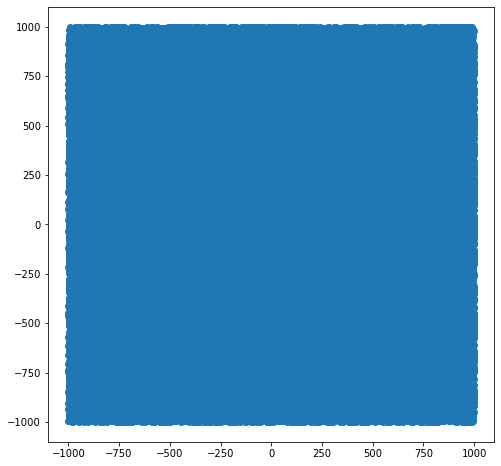

In [106]:
pointsA_x = []
pointsA_y = []
N = int(1e5)
LIMIT = int(1e3)

for _ in range(N):
    x = uniform(-1e3, 1e3)
    y = uniform(-1e3, 1e3)
    pointsA_x.append(x)
    pointsA_y.append(y)

adjust_plot(LIMIT)
plt.scatter(pointsA_x, pointsA_y)

## Generowanie punktów zbioru B)

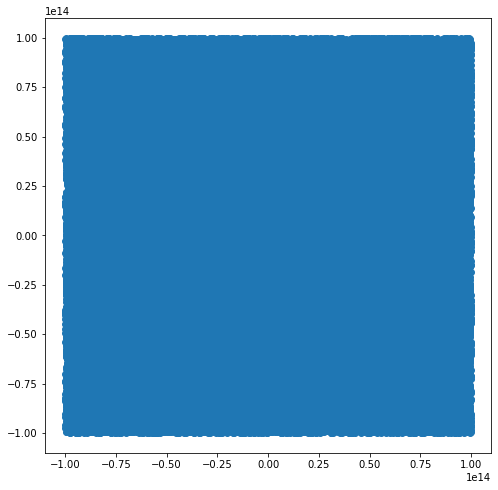

In [107]:
pointsB_x = []
pointsB_y = []
N = int(1e5)
LIMIT = int(1e14)

for _ in range(N):
    x = uniform(-1e14, 1e14)
    y = uniform(-1e14, 1e14)
    pointsB_x.append(x)
    pointsB_y.append(y)
adjust_plot(LIMIT)
plt.scatter(pointsB_x, pointsB_y)

## Generowanie punktów zbioru C)

<Figure size 576x576 with 0 Axes>

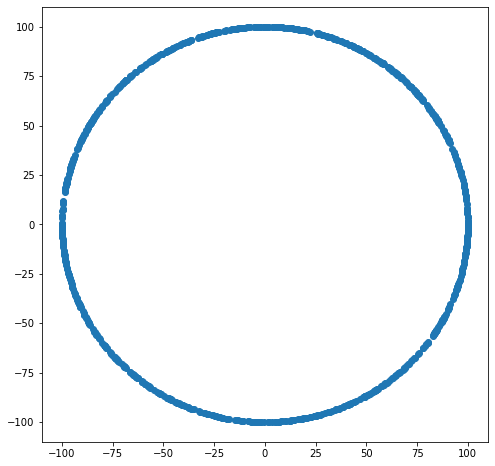

In [108]:
pointsC_x = []
pointsC_y = []
N = int(1e3)
RADIUS = 100


for _ in range(N):
    s = uniform(0, 2*np.pi)
    
    x = np.cos(s)*RADIUS
    y = np.sin(s)*RADIUS
    pointsC_x.append(x)
    pointsC_y.append(y)
fig = plt.figure(figsize = (8, 8))
adjust_plot(RADIUS)
plt.scatter(pointsC_x, pointsC_y)

## Generowanie punktów zbioru D

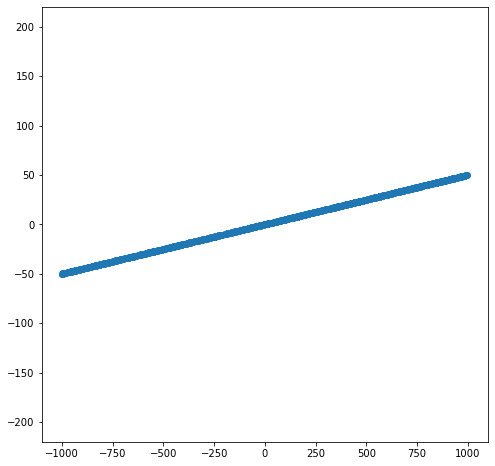

In [112]:
pointsD_x = []
pointsD_y = []
N = int(1e3)
LIMIT_X = int(1e3)
LIMIT_Y = 200

# postać prostej a*x + b
# a - nachylenie krzywej,
# b - stała

a = (A[1] - B[1]) / (A[0] - B[0])
b = A[1] - A[0] * a
for _ in range(N):
    x = uniform(-1e3, 1e3)
    y = a * x + b
    pointsD_x.append(x)
    pointsD_y.append(y)

adjust_plot_2dim(LIMIT_X, LIMIT_Y)
plt.scatter(pointsD_x, pointsD_y)
plt.show()

   # Podział punktów

Funkcja group_points(X, Y) grupuje punkty na:

* leżące pod prostą wyznaczoną przez A i B
* współliniowe z tą prostą
* leżącego nad prostą.

Taki podział wykonuje dla każdej z 4 metod liczenia wyznaczników (zaimplementowanych wyżej oraz tych pochodzących z biblioteki numpy).

In [110]:
def group_points(X, Y):
    results_x = [[[[], [], []] for t in range(3)] for det in range(4)]
    results_y = [[[[], [], []] for t in range(3)] for det in range(4)]
    
    N = len(X)
    
    for p in range(N):
        x = X[p]
        y = Y[p]
        
        matrix3d = np.array([[A[0], A[1], 1],
                            [B[0], B[1], 1],
                            [x, y, 1]])
        
        matrix2d = np.array([[A[0] - x, A[1] - y],
                             [B[0] - x, B[1] - y]])
        
        determinants = [np.linalg.det(matrix2d), det_2_x_2(matrix2d),
                        np.linalg.det(matrix3d), det_3_x_3(matrix3d)]
        
        for i in range(len(determinants)):
            for j in range(len(tolerances)):
                if abs(determinants[i]) < tolerances[j]:
                    results_x[i][j][0].append(x)
                    results_y[i][j][0].append(y)
                elif determinants[i] > 0:
                    results_x[i][j][1].append(x)
                    results_y[i][j][1].append(y)
                else:
                    results_x[i][j][2].append(x)
                    results_y[i][j][2].append(y)
                    
    return results_x, results_y

In [111]:
result1 = group_points(pointsA_x, pointsA_y)
result2 = group_points(pointsB_x, pointsB_y)
result3 = group_points(pointsC_x, pointsC_y)
result4 = group_points(pointsD_x, pointsD_y)

## Porównania wyznaczników